In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
global_temp=pd.read_csv('C:/Users/vedan/Downloads/GlobalTemperatures.csv')

In [3]:
def getyear(date):
    return date.split('-')[0]

In [4]:
global_temp['Year']=global_temp['dt'].apply(getyear)

In [5]:
df=global_temp.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [6]:
df['Uncertainty_top']=df['LandAverageTemperature'] + df['LandAverageTemperatureUncertainty']

In [7]:
df['Uncertainty_bot']=df['LandAverageTemperature'] - df['LandAverageTemperatureUncertainty']

In [8]:
df.head()

Year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   Uncertainty_top  Uncertainty_bot  
0        11.357182         6.081545  
1        10.757286         5.195000  
2         8.756833         2.802833  
3        11.564083         5.212083  
4        11.963583         4.975083

In [9]:
def toint(s):
    return int(s)
df['Year']=df['Year'].apply(toint)
df.head()

Year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   Uncertainty_top  Uncertainty_bot  
0        11.357182         6.081545  
1        10.757286         5.195000  
2         8.756833         2.802833  
3        11.564083         5.212083  
4        11.963583         4.975083

In [10]:
df.head()

Year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   Uncertainty_top  Uncertainty_bot  
0        11.357182         6.081545  
1        10.757286         5.195000  
2         8.756833         2.802833  
3        11.564083         5.212083  
4        11.963583         4.975083

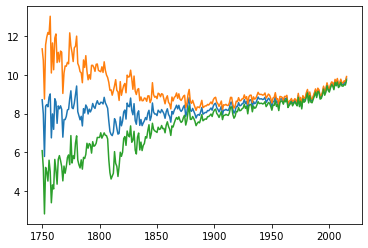

In [11]:
plt.plot(df['Year'],df['LandAverageTemperature'],df['Year'],df['Uncertainty_top'],df['Year'],df['Uncertainty_bot'])

In [12]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [13]:
global_temp['month']=global_temp['dt'].dt.month

In [14]:
def getseason(month):
    if month>=3 and month<=5:
        return 'spring'
    if month>=6 and month<=8:
        return 'summer'
    if month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [15]:
global_temp['season']=global_temp['month'].apply(getseason)

In [16]:
global_temp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  Year  month  season  
0                                        NaN  1750      1  winter  
1                                        NaN  1750      2  winter  
2                                        NaN  1750      3  spring  
3                                        NaN  1750      4  spring  
4                                        NaN  1750      5  spring

In [17]:
springt=[]
summert=[]
autumnt=[]
wintert=[]
global_temp[global_temp['Year']=='1950']


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
2400 1950-01-01                   2.008                              0.173   
2401 1950-02-01                   2.721                              0.182   
2402 1950-03-01                   5.247                              0.150   
2403 1950-04-01                   8.123                              0.192   
2404 1950-05-01                  11.297                              0.217   
2405 1950-06-01                  13.382                              0.196   
2406 1950-07-01                  14.140                              0.239   
2407 1950-08-01                  13.460                              0.228   
2408 1950-09-01                  11.952                              0.204   
2409 1950-10-01                   9.153                              0.164   
2410 1950-11-01                   5.372                              0.139   
2411 1950-12-01                   3.528                              0.152   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
2400               7.611                          0.207              -3.622   
2401               8.475                          0.209              -3.013   
2402              11.173                          0.158              -0.693   
2403              14.157                          0.216               2.043   
2404              17.252                          0.259               5.421   
2405              19.290                          0.232               7.501   
2406              19.882                          0.275               8.417   
2407              19.390                          0.267               7.729   
2408              17.737                          0.209               6.205   
2409              14.918                          0.159               3.452   
2410              11.077                          0.186              -0.426   
2411               9.123                          0.205              -2.071   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
2400                          0.236                          13.311   
2401                          0.217                          13.554   
2402                          0.200                          14.296   
2403                          0.280                          15.093   
2404                          0.286                          16.033   
2405                          0.224                          16.660   
2406                          0.291                          16.981   
2407                          0.260                          16.731   
2408                          0.215                          16.124   
2409                          0.193                          15.245   
2410                          0.190                          14.060   
2411                          0.201                          13.586   

      LandAndOceanAverageTemperatureUncertainty  Year  month  season  
2400                                      0.095  1950      1  winter  
2401                                      0.101  1950      2  winter  
2402                                      0.097  1950      3  spring  
2403                                      0.102  1950      4  spring  
2404                                      0.106  1950      5  spring  
2405                                      0.105  1950      6  summer  
2406                                      0.115  1950      7  summer  
2407                                      0.108  1950      8  summer  
2408                                      0.106  1950      9  autumn  
2409                                      0.103  1950     10  autumn  
2410                                      0.093  1950     11  autumn  
2411                                      0.097  1950     12  winter

In [18]:
years=global_temp['Year'].unique()
for year in years:
    currdf=global_temp[global_temp['Year']==year]
    springt.append(currdf[currdf['season']=='spring']['LandAverageTemperature'].mean())
    summert.append(currdf[currdf['season']=='summer']['LandAverageTemperature'].mean())
    autumnt.append(currdf[currdf['season']=='autumn']['LandAverageTemperature'].mean())
    wintert.append(currdf[currdf['season']=='winter']['LandAverageTemperature'].mean())

In [19]:
seasons=pd.DataFrame()
seasons['year']=years
seasons['spring_temps']=springt
seasons['summer_temps']=summert
seasons['autumn_temps']=autumnt
seasons['winter_temps']=wintert
seasons.head()

year  spring_temps  summer_temps  autumn_temps  winter_temps
0  1750      8.563000     14.518333      8.890000      2.963000
1  1751      6.735000     14.116000     10.673000      1.729000
2  1752      7.035500           NaN      7.587000      2.717000
3  1753      8.627333     14.608333      9.212333      1.104333
4  1754      9.074333     14.208333      8.957333      1.637333

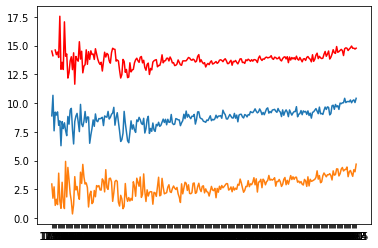

In [20]:
plt.plot(seasons['year'],seasons['spring_temps'],'y ')
plt.plot(seasons['year'],seasons['summer_temps'],'r')
plt.plot(seasons['year'],seasons['autumn_temps'])
plt.plot(seasons['year'],seasons['winter_temps'])
plt.show()

In [21]:
citydata=pd.read_csv('C:/Users/vedan/Downloads/GlobalLandTemperaturesByCity.csv')

In [22]:
citydata.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [23]:
usa=citydata[citydata['Country']=='United States']
cities=['New York','Los Angeles','San Francisco']
data=usa[usa['City'].isin(cities)]

In [24]:
data=data[['dt','AverageTemperature']]
data.columns=['Date','Temperature']
data.head()

Date  Temperature
4356748  1849-01-01        8.819
4356749  1849-02-01        9.577
4356750  1849-03-01       11.814
4356751  1849-04-01       13.704
4356752  1849-05-01       14.834

In [25]:
data['Date']=pd.to_datetime(data['Date'])

In [26]:
data.dropna(inplace=True)

In [27]:
data.set_index('Date',inplace=True)

In [28]:
data.head()

Temperature
Date                   
1849-01-01        8.819
1849-02-01        9.577
1849-03-01       11.814
1849-04-01       13.704
1849-05-01       14.834

<AxesSubplot:xlabel='Date', ylabel='Temperature'>

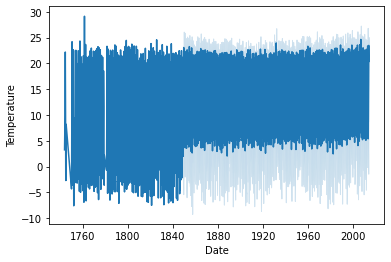

In [29]:
sns.lineplot(data.index,data['Temperature'])

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def adfullertest(Temp):
    result=adfuller(Temp)
    labels=['ADF','p-value','#lags','no of observations']
    for value,label in zip(result,labels):
        print('{}:{}'.format(label,value))
    if result[1]<=0.05:
        print('Strong evidence against NULL hypothesis hence data is stationary')
    else:
        print('Data is not stationary')

In [32]:
adfullertest(data['Temperature'])

ADF:-2.0063893036757965
p-value:0.2837786583333257
#lags:35
no of observations:7037
Data is not stationary


In [33]:
df=data.copy()

In [34]:
df.head()

Temperature
Date                   
1849-01-01        8.819
1849-02-01        9.577
1849-03-01       11.814
1849-04-01       13.704
1849-05-01       14.834

In [35]:
df['first difference temp']=df['Temperature']-df['Temperature'].shift(12)

In [36]:
df.head()

Temperature  first difference temp
Date                                          
1849-01-01        8.819                    NaN
1849-02-01        9.577                    NaN
1849-03-01       11.814                    NaN
1849-04-01       13.704                    NaN
1849-05-01       14.834                    NaN

In [37]:
adfullertest(df['first difference temp'].dropna())

ADF:-21.239650404910893
p-value:0.0
#lags:35
no of observations:7025
Strong evidence against NULL hypothesis hence data is stationary


<AxesSubplot:xlabel='Date'>

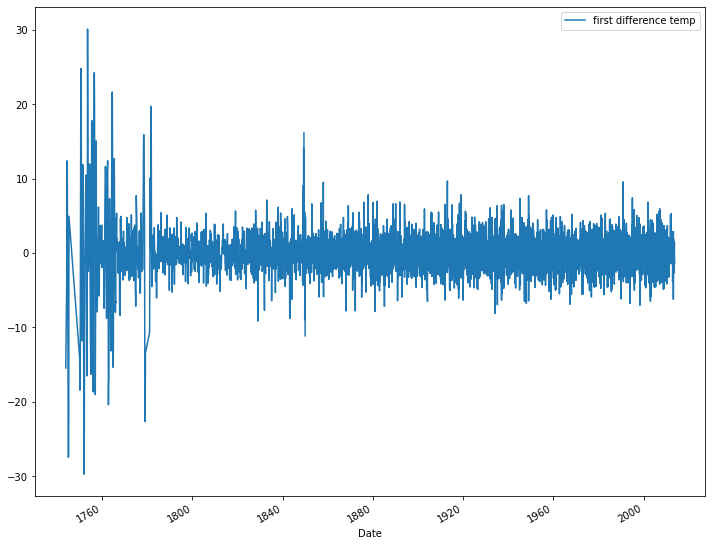

In [38]:
df[['first difference temp']].plot(figsize=(12,10))

In [39]:
data.head()

Temperature
Date                   
1849-01-01        8.819
1849-02-01        9.577
1849-03-01       11.814
1849-04-01       13.704
1849-05-01       14.834

In [40]:
data['month']=data.index.month
data['year']=data.index.year
data.head()

Temperature  month  year
Date                                
1849-01-01        8.819      1  1849
1849-02-01        9.577      2  1849
1849-03-01       11.814      3  1849
1849-04-01       13.704      4  1849
1849-05-01       14.834      5  1849

In [41]:
pivot=data.pivot_table(values='Temperature',index='month',columns='year')

In [42]:
pivot.head()

year   1743    1744   1745    1750   1751   1752    1753   1754    1755  \
month                                                                     
1       NaN     NaN -2.363  -4.310 -3.591 -7.588  -3.122 -2.252  -3.193   
2       NaN     NaN -2.671  -2.719 -2.051    NaN  -1.467 -2.583  -1.802   
3       NaN     NaN  1.363   2.773  3.256  3.322   4.207  2.728   1.112   
4       NaN   9.788  8.209   8.848  7.992  7.402   8.099    NaN   8.714   
5       NaN  15.708    NaN  15.411    NaN    NaN  15.330    NaN  15.238   

year    1756  ...       2004       2005       2006    2007       2008  \
month         ...                                                       
1     -1.985  ...   4.080333   4.923000   7.135333   5.656   5.216333   
2      0.259  ...   6.100000   7.297000   7.547667   5.634   6.754333   
3        NaN  ...  12.184000   9.124667   7.527333  10.586   9.733667   
4        NaN  ...  13.806333  12.546000  12.051667  12.342  13.113000   
5        NaN  ...  17.817333  15.982333  17.123333  17.150  15.800333   

year        2009       2010       2011       2012       2013  
month                                                         
1       5.550333   5.776667   5.109333   7.177667   5.388333  
2       6.540667   6.788000   5.777333   7.970000   6.222667  
3       9.211000  10.486667   9.115000  10.604333  10.162333  
4      12.744000  12.254000  12.710000  13.075000  13.880000  
5      17.565667  15.856333  15.724000  17.670333  17.335333  

[5 rows x 266 columns]

Text(0, 0.5, 'Temperature')

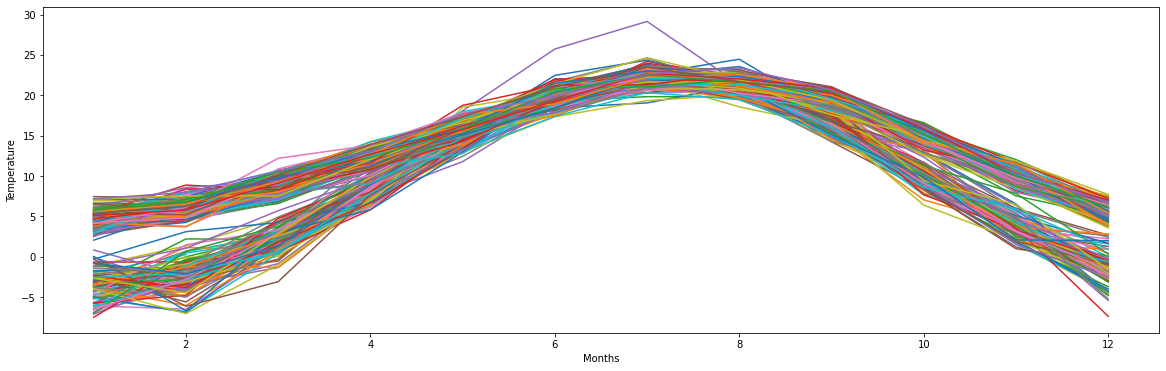

In [43]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')

<AxesSubplot:xlabel='month'>

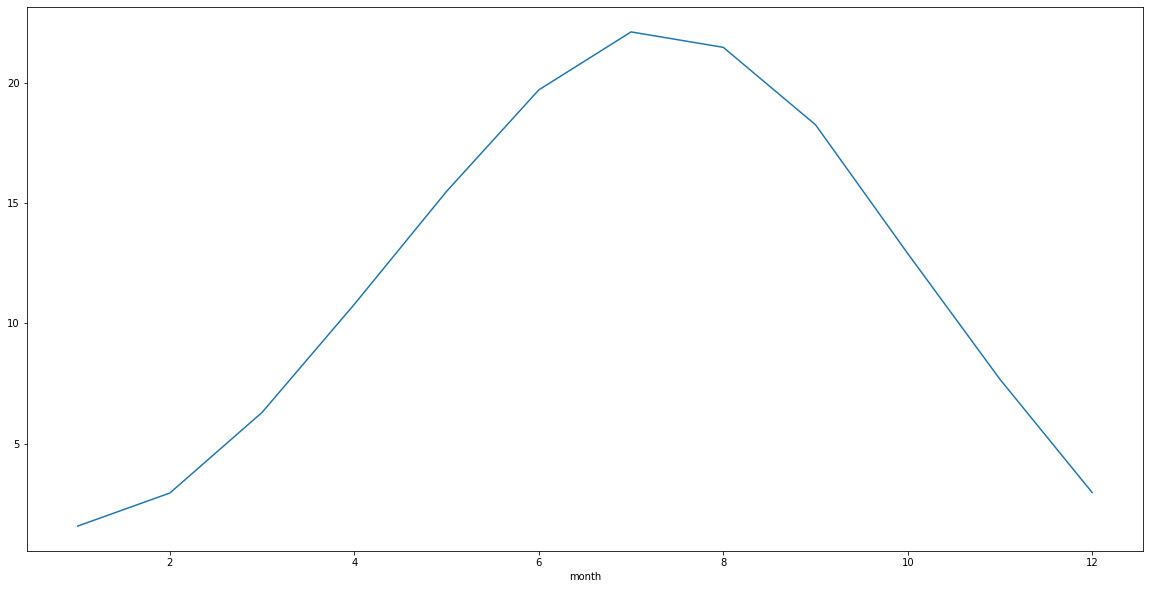

In [44]:
seasonality=pivot.mean(axis=1)
seasonality.plot(figsize=(20,10))

In [45]:
df=df[['first difference temp']]
df.dropna(inplace=True)
df.head()

first difference temp
Date                             
1850-01-01                 -1.732
1850-02-01                 -1.002
1850-03-01                 -1.449
1850-04-01                  0.031
1850-05-01                  1.799

In [46]:
df['first difference temp'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first difference temp, Length: 7061, dtype: float64

In [47]:
value=pd.DataFrame(df['first difference temp'])
tempdf=pd.concat([value,df['first difference temp'].rolling(window=5).mean()],axis=1)
tempdf.columns=['actual temp','forecast temp']
tempdf

actual temp  forecast temp
Date                                  
1850-01-01       -1.732            NaN
1850-02-01       -1.002            NaN
1850-03-01       -1.449            NaN
1850-04-01        0.031            NaN
1850-05-01        1.799        -0.4706
...                 ...            ...
2013-05-01        0.879         0.4336
2013-06-01        1.277         1.0236
2013-07-01        1.025         1.4060
2013-08-01       -0.800         0.8454
2013-09-01        1.426         0.7614

[7061 rows x 2 columns]

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
rms_error=np.sqrt(mean_squared_error(tempdf['forecast temp'][4:],tempdf['actual temp'][4:]))
rms_error

2.3934235122562058

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

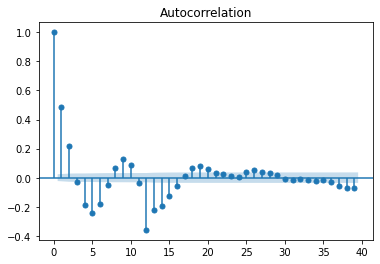

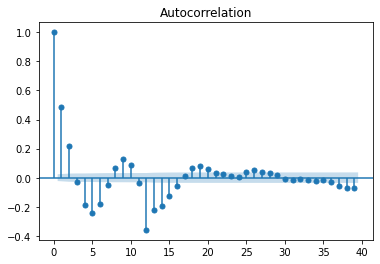

In [52]:
plot_acf(df['first difference temp'].dropna())

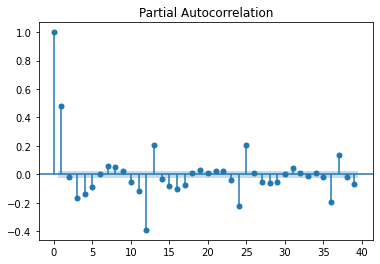

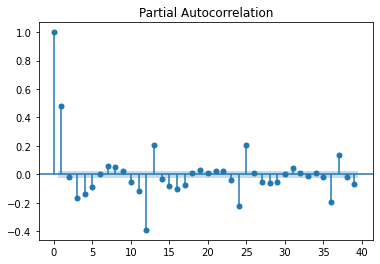

In [53]:
plot_pacf(df['first difference temp'].dropna())

In [54]:
df.isna().sum()

first difference temp    0
dtype: int64

In [55]:
training_data=df[0:6000]
test_data=df[6000:]

In [56]:
arima=ARIMA(training_data,order=(2,1,3))

C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [57]:
model=arima.fit()

C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
predictions=model.forecast(steps=len(test_data))[0]

In [59]:
np.sqrt(mean_squared_error(test_data,predictions))

1.512041624664042

In [60]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train=df[0:6000]
            test=df[6000:]
            predictions=[]
            for i in range(0,len(test)):
                try:
                    arima=ARIMA(train,order)
                    model=arima.fit(disp=0)
                    pred=model.forecast()[0]
                    predictions.append(pred)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))
                except:
                    continue

C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.283672925063451 with order (0, 0, 0)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.522758613697545 with order (0, 0, 1)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.295371234210129 with order (0, 0, 2)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.3855392336785393 with order (0, 0, 3)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.689411553554821 with order (0, 1, 0)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

MSE is 2.393995714218374 with order (0, 1, 1)


C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vedan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i